In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import statistics
from matplotlib.font_manager import FontProperties
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('max_columns', None)

In [2]:
def generate_dataframe(df, filename, opponent, home):
    df2 = pd.read_csv(filename, skiprows=9)
    df2 = df2[['Player Name', 'Date', 'Period Name', 'Position Name', 'Total Player Load', 'Player Load Per Minute', 'IMA Accel Low', 'IMA Accel Medium', 'IMA Accel High', 'IMA Decel Low', 'IMA Decel Medium', 'IMA Decel High', 'Average Player Load', 'Peak Player Load', 'High Intensity Movement', 'Jumps/Minute', 'Explosive Percentage', 'Accel-decel total ratio']]
    df2['opponent'] = opponent
    df2['home'] = home                 
    df = pd.concat([df, df2])
    return df


In [3]:
df = pd.read_csv("Game_Data/2020_01_28_1741-Game_v_Nebraska_12820.csv", skiprows=9)
df = df[['Player Name', 'Date', 'Period Name', 'Position Name', 'Total Player Load', 'Player Load Per Minute', 'IMA Accel Low', 'IMA Accel Medium', 'IMA Accel High', 'IMA Decel Low', 'IMA Decel Medium', 'IMA Decel High', 'Average Player Load', 'Peak Player Load', 'High Intensity Movement', 'Jumps/Minute', 'Explosive Percentage', 'Accel-decel total ratio']]
df['opponent'] = 'Nebraska'
df['Home'] = False

df = generate_dataframe(df, "Game_Data/2020_03_05_1723-Game_vs_Nebraska_03052020.csv", "Nebraska", True)
df = generate_dataframe(df, "Game_Data/2020_01_22_1754-Game_v_Penn_State_12220.csv", "Penn State", True)
df = generate_dataframe(df, "Game_Data/2020_01_17_1935-Game_v_Iowa_11720.csv", "Iowa", False)
df = generate_dataframe(df, "Game_Data/2020_02_08_1105-Gam_v_Mich_State_2820.csv", "Michigan State", True)
df = generate_dataframe(df, "Game_Data/2020_01_05_1209-Game_v_MSU_1520.csv", "Michigan State", False)
df = generate_dataframe(df, "Game_Data/2020_01_09_1801-Game_v_Purdue_1920.csv", "Purdue", True)
df = generate_dataframe(df, "Game_Data/2020_01_12_1139-Game_v_Minn_11220.csv", "Minnesota", False)
df = generate_dataframe(df, "Game_Data/2020_01_25_1057-Game_v_Illinois_12520.csv", "Illinois", True)
df = generate_dataframe(df, "Game_Data/2020_02_01_1511-Game_v_Rutgers_2120.csv", "Rutgers", False)
df = generate_dataframe(df, "Game_Data/2020_02_04_1801-Game_v_Ohio_State_2520.csv", "Ohio State", True)
df = generate_dataframe(df, "Game_Data/2020_02_12_1937-Game_v_Northwestern_21220.csv", "Northwestern", False)
df = generate_dataframe(df, "Game_Data/2020_02_16_1200-Game_vs_Indiana_02162020.csv", "Indiana", True)
df = generate_dataframe(df, "Game_Data/2020_02_19_1742-Game_at_Rutgers_02192020.csv", "Rutgers", False)
df = generate_dataframe(df, "Game_Data/2020_02_22_1244-Game_at_Purdue_0222020.csv", "Purdue", False)
df = generate_dataframe(df, "Game_Data/2020_02_27_1800-Game_vs_Wisconsin_02272020.csv", "Wisconsin", True)
df = generate_dataframe(df, "Game_Data/2020_03_01_1447-Game_at_Ohio_State_03012020.csv", "Ohio State", False)
df = generate_dataframe(df, "Game_Data/2020_03_08_1048-Game_vs_Maryland_03082020.csv", "Maryland", False)
df = generate_dataframe(df, "Game_Data/2019_12_11_1945-Game_v_Illinois_121119.csv", "Illinois", False)


In [4]:
adv = pd.read_csv('advanced_school_stats.csv', skiprows=1)
adv = adv.set_index('School').drop(['Unnamed: 8', 'Unnamed: 11'], axis=1)

adv.head()

,Rk,G,W,L,W-L%,SRS,SOS,W.1,L.1,W.2,L.2,Unnamed: 14,W.3,L.3,Unnamed: 17,Tm.,Opp.,Unnamed: 20,Pace,ORtg,FTr,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA
School,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abilene Christian,1,31,20,11,0.645,-2.87,-6.87,15,5,13,3,NaN,7,8,NaN,2352,2024,NaN,71.1,105.0,0.383,0.373,0.549,50.1,56.6,13.1,7.9,0.507,16.9,30.6,0.284
Air Force,2,32,12,20,0.375,-0.37,3.02,5,13,8,7,NaN,3,9,NaN,2338,2386,NaN,68.9,106.0,0.357,0.417,0.568,50.0,58.5,7.3,4.6,0.534,16.1,22.7,0.261
Akron,3,31,24,7,0.774,7.15,-0.40,14,4,15,2,NaN,8,4,NaN,2348,2062,NaN,70.6,107.2,0.351,0.444,0.562,50.7,51.4,7.2,7.3,0.521,16.0,27.9,0.271
Alabama A&M,4,30,8,22,0.267,-18.88,-8.85,5,13,6,5,NaN,2,16,NaN,1845,2146,NaN,69.6,87.9,0.327,0.317,0.462,47.5,49.7,8.3,5.7,0.424,16.4,24.7,0.219
Alabama-Birmingham,5,32,19,13,0.594,-0.94,-1.64,9,9,11,6,NaN,5,7,NaN,2154,2088,NaN,67.2,100.2,0.351,0.300,0.537,54.7,43.2,8.9,8.7,0.503,19.0,31.7,0.247


In [5]:
B10 = ['Illinois',
'Indiana',
'Iowa',
'Maryland',
'Michigan State',
'Minnesota',
'Nebraska',
'Northwestern',
'Ohio State',
'Penn State',
'Purdue',
'Rutgers',
'Wisconsin']

In [6]:
b10_adv = adv.loc[B10]
b10_adv.sort_values(by='Pace')
b10_adv['PPG'] = b10_adv['Tm.']/b10_adv['G']
b10_adv['oPPG'] = b10_adv['Opp.']/b10_adv['G']
b10_adv = b10_adv[['W-L%', 'PPG', 'oPPG', 'Pace', 'ORtg', 'FTr', '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'ORB%']].sort_values(by='Pace', ascending=False)
b10_adv

,W-L%,PPG,oPPG,Pace,ORtg,FTr,3PAr,TS%,TRB%,AST%,STL%,BLK%,TOV%,ORB%
School,,,,,,,,,,,,,,
Nebraska,0.219,69.843750,78.093750,72.8,94.1,0.290,0.396,0.488,44.0,54.2,9.4,6.1,14.2,22.1
Penn State,0.677,75.064516,68.193548,71.4,105.1,0.310,0.396,0.525,50.8,53.2,10.5,12.1,13.6,29.3
Iowa,0.645,77.741935,72.290323,70.6,110.2,0.344,0.376,0.554,51.5,63.9,8.7,10.6,14.7,32.0
Michigan State,0.710,75.903226,64.741935,69.4,109.4,0.308,0.375,0.560,55.1,65.0,7.4,13.4,15.6,32.8
Indiana,0.625,71.437500,66.718750,68.7,103.6,0.392,0.296,0.528,54.0,51.0,8.1,12.6,15.7,32.4
Maryland,0.774,71.806452,64.483871,67.7,106.0,0.377,0.431,0.532,52.9,55.0,6.8,11.8,14.3,31.5
Rutgers,0.645,69.935484,62.645161,67.7,102.5,0.291,0.300,0.516,54.0,47.8,9.6,13.6,15.3,32.4
Illinois,0.677,72.225806,65.290323,67.5,106.6,0.332,0.309,0.528,55.3,50.7,7.2,7.3,15.0,35.8
Minnesota,0.484,71.129032,66.290323,67.3,104.9,0.275,0.407,0.521,52.1,58.5,7.0,11.3,14.2,31.3


In [7]:
df = df.merge(b10_adv, how='left', left_on="opponent", right_index=True)

In [8]:
df['Period Name'] = df["Period Name"].replace("second", "second half")
gb = df.groupby("Player Name")
game_df = pd.DataFrame(columns=df.columns).set_index(["Date", "Period Name"])

for pla in gb.groups.keys():
    player = gb.get_group(pla) 
    dates = player['Date'].unique()
    player = player.set_index(["Date", "Period Name"])
    for date in dates:
        try:
            game_df = game_df.append(player.loc[(date, "first half")])
            game_df.loc[(date, "first half"), "Total Player Load"] += player.loc[(date, "second half"), "Total Player Load"]
            game_df.loc[(date, "first half"), "Player Load Per Minute"] = (game_df.loc[(date, "first half"), "Player Load Per Minute"] + 
                                                                           player.loc[(date, "second half"), "Player Load Per Minute"])/2
            game_df.loc[(date, "first half"), "IMA Accel Low"] += player.loc[(date, "second half"), "IMA Accel Low"]
            game_df.loc[(date, "first half"), "IMA Accel Medium"] += player.loc[(date, "second half"), "IMA Accel Medium"]
            game_df.loc[(date, "first half"), "IMA Accel High"] += player.loc[(date, "second half"), "IMA Accel High"]
            game_df.loc[(date, "first half"), "IMA Decel Low"] += player.loc[(date, "second half"), "IMA Decel Low"]
            game_df.loc[(date, "first half"), "IMA Decel Medium"] += player.loc[(date, "second half"), "IMA Decel Medium"]
            game_df.loc[(date, "first half"), "IMA Decel High"] += player.loc[(date, "second half"), "IMA Decel High"]
            game_df.loc[(date, "first half"), "Average Player Load"] = (game_df.loc[(date, "first half"), "Average Player Load"] + 
                                                                           player.loc[(date, "second half"), "Average Player Load"])/2
            game_df.loc[(date, "first half"), "Peak Player Load"] = max(player.loc[(date, "second half"), "Peak Player Load"], 
                                                                        game_df.loc[(date, "first half"), "Peak Player Load"])
            game_df.loc[(date, "first half"), "High Intensity Movement"] += player.loc[(date, "second half"), "High Intensity Movement"]
            game_df.loc[(date, "first half"), "Jumps/Minute"] += player.loc[(date, "second half"), "Jumps/Minute"]
            game_df.loc[(date, "first half"), "Accel-decel total ratio"] = (game_df.loc[(date, "first half"), "Accel-decel total ratio"] + 
                                                                           player.loc[(date, "second half"), "Accel-decel total ratio"])/2
            game_df.loc[(date, "first half"), "Explosive Percentage"] = (game_df.loc[(date, "first half"), "Explosive Percentage"] + 
                                                                           player.loc[(date, "second half"), "Explosive Percentage"])/2
        except:
            # Player did not play in game, continue
            continue
game_df.head()

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\pandas\core\indexing.py:1761: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:2858: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\IPython\core\async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


,,Player Name,Position Name,Total Player Load,Player Load Per Minute,IMA Accel Low,IMA Accel Medium,IMA Accel High,IMA Decel Low,IMA Decel Medium,IMA Decel High,Average Player Load,Peak Player Load,High Intensity Movement,Jumps/Minute,Explosive Percentage,Accel-decel total ratio,opponent,Home,home,W-L%,PPG,oPPG,Pace,ORtg,FTr,3PAr,TS%,TRB%,AST%,STL%,BLK%,TOV%,ORB%
Date,Period Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/28/2020,first half,Adrien Nunez,Wing,1978.42572,3.345944,214,81,42,244,75,40,207.720032,4.83345,248,19.60785,30.775365,1.145445,Nebraska,False,NaN,0.219,69.843750,78.093750,72.8,94.1,0.290,0.396,0.488,44.0,54.2,9.4,6.1,14.2,22.1
03/05/2020,first half,Adrien Nunez,Wing,2064.08839,3.559129,216,47,42,288,84,40,217.089231,4.07152,50,3.09677,20.833335,0.818520,Nebraska,NaN,1.0,0.219,69.843750,78.093750,72.8,94.1,0.290,0.396,0.488,44.0,54.2,9.4,6.1,14.2,22.1
01/22/2020,first half,Adrien Nunez,Wing,2618.94819,5.262593,277,67,65,368,106,61,356.042055,2.53717,31,5.64706,5.000000,1.131580,Penn State,NaN,1.0,0.677,75.064516,68.193548,71.4,105.1,0.310,0.396,0.525,50.8,53.2,10.5,12.1,13.6,29.3
01/17/2020,first half,Adrien Nunez,Wing,2889.11573,5.544239,280,81,69,372,103,55,376.830745,4.52540,76,12.98580,34.350775,1.059115,Iowa,NaN,0.0,0.645,77.741935,72.290323,70.6,110.2,0.344,0.376,0.554,51.5,63.9,8.7,10.6,14.7,32.0
02/08/2020,first half,Adrien Nunez,Wing,2926.01564,5.001155,263,104,70,402,113,53,346.895562,2.98370,23,3.94286,25.588235,0.765110,Michigan State,NaN,1.0,0.710,75.903226,64.741935,69.4,109.4,0.308,0.375,0.560,55.1,65.0,7.4,13.4,15.6,32.8


In [9]:
game_df = game_df.reset_index()

game_df["Date"] = pd.to_datetime(game_df["Date"])
game_df = game_df.sort_values("Date")
game_df['Period Name'] = game_df["Period Name"].replace("first half", "game")
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', None)

game_df = game_df.set_index('Player Name')

In [10]:
game_df.columns

Index(['Date', 'Period Name', 'Position Name', 'Total Player Load',
       'Player Load Per Minute', 'IMA Accel Low', 'IMA Accel Medium',
       'IMA Accel High', 'IMA Decel Low', 'IMA Decel Medium', 'IMA Decel High',
       'Average Player Load', 'Peak Player Load', 'High Intensity Movement',
       'Jumps/Minute', 'Explosive Percentage', 'Accel-decel total ratio',
       'opponent', 'Home', 'home', 'W-L%', 'PPG', 'oPPG', 'Pace', 'ORtg',
       'FTr', '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'ORB%'],
      dtype='object')

In [11]:
game_df
print(game_df.shape[0])

201


In [12]:
#filters out starters, but we can change this later
df = game_df.loc[['Austin Davis','Brandon Johns','David DeJulius','Eli Brooks','Franz Wagner','Isaiah Livers','Jon Teske','Xavier Simpson']]
#starters = game_df.loc[['Austin Davis','Brandon Johns','David DeJulius','Eli Brooks', a'Franz Wagner','Isaiah Livers','Jon Teske','Xavier Simpson']]
#df = df.groupby(['Position Name']).get_group("Wing")

df.loc['Isaiah Livers']['Position Name'] = 'Wing'
df

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Period Name,Position Name,Total Player Load,Player Load Per Minute,IMA Accel Low,IMA Accel Medium,IMA Accel High,IMA Decel Low,IMA Decel Medium,IMA Decel High,Average Player Load,Peak Player Load,High Intensity Movement,Jumps/Minute,Explosive Percentage,Accel-decel total ratio,opponent,Home,home,W-L%,PPG,oPPG,Pace,ORtg,FTr,3PAr,TS%,TRB%,AST%,STL%,BLK%,TOV%,ORB%
Player Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Austin Davis,2019-12-11,game,Post,2618.35003,5.636363,256,84,67,375,105,52,371.991727,1.51130,7,0.47059,0.00000,1.83333,Illinois,NaN,0.0,0.677,72.225806,65.290323,67.5,106.6,0.332,0.309,0.528,55.3,50.7,7.2,7.3,15.0,35.8
Austin Davis,2020-01-05,game,Post,2629.40736,4.708255,266,84,73,363,97,63,324.659150,5.52424,102,7.86885,37.19008,1.01667,Michigan State,NaN,0.0,0.710,75.903226,64.741935,69.4,109.4,0.308,0.375,0.560,55.1,65.0,7.4,13.4,15.6,32.8
Austin Davis,2020-01-09,game,Post,3854.27193,6.250759,326,131,97,534,169,89,638.165692,5.36338,94,12.00000,36.60714,1.09091,Purdue,NaN,1.0,0.516,68.193548,62.645161,64.7,102.9,0.258,0.362,0.504,53.0,54.2,9.8,11.3,14.6,34.9
Austin Davis,2020-01-12,game,Post,2403.56712,5.628357,290,70,62,328,98,43,338.650916,3.69749,37,6.54545,41.17647,1.30435,Minnesota,NaN,0.0,0.484,71.129032,66.290323,67.3,104.9,0.275,0.407,0.521,52.1,58.5,7.0,11.3,14.2,31.3
Austin Davis,2020-01-17,game,Post,2874.91730,5.546040,293,74,68,349,107,58,376.928476,3.73478,106,11.17241,22.72727,1.61765,Iowa,NaN,0.0,0.645,77.741935,72.290323,70.6,110.2,0.344,0.376,0.554,51.5,63.9,8.7,10.6,14.7,32.0
Austin Davis,2020-01-22,game,Post,2611.49376,5.264253,254,71,67,357,112,64,356.105679,4.12831,59,3.57447,29.62963,0.70588,Penn State,NaN,1.0,0.677,75.064516,68.193548,71.4,105.1,0.310,0.396,0.525,50.8,53.2,10.5,12.1,13.6,29.3
Austin Davis,2020-01-25,game,Post,2478.41944,4.366461,253,78,61,275,105,48,317.202230,4.77742,67,2.71698,29.72973,1.20513,Illinois,NaN,1.0,0.677,72.225806,65.290323,67.5,106.6,0.332,0.309,0.528,55.3,50.7,7.2,7.3,15.0,35.8
Austin Davis,2020-01-28,game,Post,1586.79831,3.323961,173,56,33,207,63,29,206.426715,1.73866,8,0.47059,0.00000,0.73333,Nebraska,False,NaN,0.219,69.843750,78.093750,72.8,94.1,0.290,0.396,0.488,44.0,54.2,9.4,6.1,14.2,22.1
Austin Davis,2020-02-01,game,Post,2845.16809,5.940094,298,103,60,399,107,62,411.547264,6.13621,128,13.09091,35.13514,1.01786,Rutgers,NaN,0.0,0.645,69.935484,62.645161,67.7,102.5,0.291,0.300,0.516,54.0,47.8,9.6,13.6,15.3,32.4


In [13]:
len(df)

129

In [14]:
sums = df.groupby(['opponent']).sum()

in_game_ranks = sums.groupby("opponent").agg({"Player Load Per Minute": np.mean}).sort_values("Player Load Per Minute", ascending=False)
#in_game_ranks

In [15]:
#from scipy import stats
#z = pd.DataFrame(columns=sums.columns)
#for col in z.columns:
     #z[col] = stats.zscore(sums[col])
#z.index = sums.index
#z.head()

In [16]:
#z_score_ranks = z.groupby("opponent").agg({"Player Load Per Minute": np.mean}).sort_values("Player Load Per Minute", ascending=False)
#z_score_ranks

In [17]:
rebs = pd.read_csv('b10_rebs_chart.csv')
rebs = rebs.set_index('TEAM')
rebs.columns

Index(['Unnamed: 0', 'G', 'TM TOT', 'TM. AVG.', 'OPP. TOT', 'OPP. AVG.',
       'MARGIN'],
      dtype='object')

In [18]:
b10_rebs = rebs[['G', 'TM TOT', 'TM. AVG.', 'OPP. TOT', 'OPP. AVG.', 'MARGIN']]
b10_rebs

,G,TM TOT,TM. AVG.,OPP. TOT,OPP. AVG.,MARGIN
TEAM,,,,,,
Michigan State,20,789,39.5,675,33.8,5.7
Illinois,20,773,38.7,685,34.3,4.4
Indiana,20,727,36.4,662,33.1,3.3
Rutgers,20,784,39.2,722,36.1,3.1
Ohio State,20,691,34.6,635,31.8,2.8
Purdue,20,732,36.6,684,34.2,2.4
Minnesota,20,781,39.1,749,37.5,1.6
Iowa,20,738,36.9,721,36.1,0.9
Maryland,20,715,35.8,708,35.4,0.4


In [19]:
b10_rebs_margin = b10_rebs[['MARGIN']]
b10_rebs_margin = b10_rebs_margin.rename(columns={"MARGIN": "REB Margin"})
b10_rebs_margin = b10_rebs_margin.drop(['Michigan'])

In [20]:
df2 = pd.concat([in_game_ranks, b10_rebs_margin], axis=1)
df2

,Player Load Per Minute,REB Margin
Purdue,83.859098,2.4
Illinois,80.574398,4.4
Michigan State,77.174242,5.7
Rutgers,76.318162,3.1
Ohio State,63.313135,2.8
Minnesota,43.084197,1.6
Indiana,42.420983,3.3
Penn State,40.458129,-3.0
Iowa,39.454488,0.9
Nebraska,38.303809,-9.7


In [21]:
avgs = pd.read_csv("b10teams19-20.csv",skiprows=1)
avgs = avgs[['School', 'W%','ORtg', 'DRtg', 'FGA', 'FG%', '3PA', '3P%', 'eFG%', 'FTA', 'ORB', "TRB", 'AST', 'STL', 'BLK', "TOV", 'PF', 'PTS', 'PTS.1', "SRS", "Pace"]].set_index('School').rename(columns={"PTS.1": "oPTS"})
avgs = avgs.drop(['Michigan'])
avgs

,W%,ORtg,DRtg,FGA,FG%,3PA,3P%,eFG%,FTA,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,oPTS,SRS,Pace
School,,,,,,,,,,,,,,,,,,,,
Maryland,0.774,106.0,95.2,57.2,0.419,24.7,0.311,0.486,21.6,11.2,38.2,13.2,4.6,4.3,11.3,14.9,71.8,64.5,17.82,67.7
Michigan State,0.710,109.4,93.3,59.1,0.461,22.2,0.348,0.526,18.2,11.1,40.6,17.7,5.1,5.0,12.5,16.9,75.9,64.7,21.92,69.4
Wisconsin,0.677,103.8,96.1,55.4,0.425,24.6,0.352,0.503,14.9,8.1,33.9,12.0,4.5,3.7,10.0,15.4,67.2,62.2,15.95,64.4
Illinois,0.677,106.6,96.3,59.1,0.443,18.3,0.309,0.491,19.6,12.7,39.5,13.3,4.9,2.9,12.1,16.0,72.2,65.3,15.27,67.5
Iowa,0.645,110.2,102.5,60.3,0.451,22.7,0.347,0.516,20.7,11.5,37.5,17.4,6.2,3.9,12.1,16.0,77.7,72.3,16.07,70.6
Ohio State,0.677,107.9,94.2,54.5,0.446,22.6,0.373,0.523,20.0,9.9,36.8,13.3,5.0,3.5,12.7,17.1,72.1,62.9,19.37,66.8
Penn State,0.677,105.1,95.5,62.3,0.431,24.7,0.325,0.495,19.3,11.2,38.7,14.3,7.5,4.8,11.2,17.5,75.1,68.2,16.12,71.4
Rutgers,0.645,102.5,91.8,59.6,0.447,17.9,0.310,0.493,17.3,11.8,40.2,12.7,6.5,4.6,12.2,16.8,69.9,62.6,15.72,67.7
Indiana,0.625,103.6,96.8,57.0,0.445,16.9,0.326,0.493,22.4,11.3,37.8,12.9,5.6,4.4,12.6,17.2,71.4,66.7,15.07,68.7


In [22]:
merged_avgs = avgs.merge(df2['REB Margin'], left_index=True, right_index=True)
merged_avgs

,W%,ORtg,DRtg,FGA,FG%,3PA,3P%,eFG%,FTA,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,oPTS,SRS,Pace,REB Margin
Maryland,0.774,106.0,95.2,57.2,0.419,24.7,0.311,0.486,21.6,11.2,38.2,13.2,4.6,4.3,11.3,14.9,71.8,64.5,17.82,67.7,0.4
Michigan State,0.710,109.4,93.3,59.1,0.461,22.2,0.348,0.526,18.2,11.1,40.6,17.7,5.1,5.0,12.5,16.9,75.9,64.7,21.92,69.4,5.7
Wisconsin,0.677,103.8,96.1,55.4,0.425,24.6,0.352,0.503,14.9,8.1,33.9,12.0,4.5,3.7,10.0,15.4,67.2,62.2,15.95,64.4,-3.3
Illinois,0.677,106.6,96.3,59.1,0.443,18.3,0.309,0.491,19.6,12.7,39.5,13.3,4.9,2.9,12.1,16.0,72.2,65.3,15.27,67.5,4.4
Iowa,0.645,110.2,102.5,60.3,0.451,22.7,0.347,0.516,20.7,11.5,37.5,17.4,6.2,3.9,12.1,16.0,77.7,72.3,16.07,70.6,0.9
Ohio State,0.677,107.9,94.2,54.5,0.446,22.6,0.373,0.523,20.0,9.9,36.8,13.3,5.0,3.5,12.7,17.1,72.1,62.9,19.37,66.8,2.8
Penn State,0.677,105.1,95.5,62.3,0.431,24.7,0.325,0.495,19.3,11.2,38.7,14.3,7.5,4.8,11.2,17.5,75.1,68.2,16.12,71.4,-3.0
Rutgers,0.645,102.5,91.8,59.6,0.447,17.9,0.310,0.493,17.3,11.8,40.2,12.7,6.5,4.6,12.2,16.8,69.9,62.6,15.72,67.7,3.1
Indiana,0.625,103.6,96.8,57.0,0.445,16.9,0.326,0.493,22.4,11.3,37.8,12.9,5.6,4.4,12.6,17.2,71.4,66.7,15.07,68.7,3.3
Purdue,0.516,102.9,94.5,60.2,0.418,21.8,0.330,0.478,15.5,12.7,36.9,13.6,6.5,3.5,11.5,17.5,68.2,62.6,16.30,64.7,2.4


In [23]:
df = pd.merge(df, b10_rebs_margin, left_on='opponent', right_index=True)
#df = df.rename(index=, inplace=True)
df = df.rename(index={'Illinois': 'ILL'})
#df = df.rename(, axis='index')
positions = df.groupby('Position Name')
positions

In [24]:
guards = positions.get_group('Guard')
wings = positions.get_group('Wing')
posts = positions.get_group('Post')
team = df.groupby(['opponent'])

In [25]:
df.groupby(['opponent']).agg({'Player Load Per Minute': np.mean})

,Player Load Per Minute
opponent,
Illinois,5.371627
Indiana,5.302623
Iowa,5.636355
Maryland,4.101732
Michigan State,5.144949
Minnesota,6.154885
Nebraska,3.830381
Northwestern,4.995130
Ohio State,4.870241


In [26]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.style.use('ggplot')
#plt.style.use('dark_background')
#plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-poster')
#plt.style.use('tableau-colorblind10')

name_abrev = {
    "Illinois": "ILL",
    "Indiana": "IND",
    "Iowa": "IOWA",
    "Michigan": "MICH",
    "Michigan State": "MSU",
    "Minnesota": "MINN",
    "Nebraska": "NEB",
    "Northwestern": "NW",
    "Ohio State": "OSU",
    "Penn State": "PSU",
    "Purdue": "PUR",
    "Rutgers": "RUTG",
    "Maryland": "UMD",
    "Wisconsin": "WIS"
}

def generate_scatter(xs, ys, df, line, pos, stat, color='r', show_points=True, nebraska=False):
    fig, ax = plt.subplots()
    axes = plt.gca()
    axes.set_ylim([3,6.5])
    
    #for splitting graph into quadrants
    s1 = sorted(xs)
    s2 = sorted(ys)
    #with averages:
#     avg1 = (s1[0] + s1[-1]) / 2
#     avg2 = (s2[0] + s2[-1]) / 2
#     plt.axvline(avg1)
#     plt.axhline(avg2)
    #with medians
#     m1 = statistics.median(xs)
#     m2 = statistics.median(ys)
#     plt.axvline(m1, color='k')
#     plt.axhline(m2, color='k')

    
    
    
    plt.xlabel("Average Opponent {} Per Game".format(stat))
    plt.ylabel("Player Load Per Min. (Michigan)")
    plt.title("2019-20 Michigan Men's Rotation {}".format(pos))
    
    if show_points == True:
        #plt.plot(xs, ys, color + 'o')
        
        plt.scatter(xs, ys, color='b', edgecolor='k')
    
    
    if line:
        # #trendline, don't need
        z = np.polyfit(xs, ys, 1)
        p = np.poly1d(z)
        
        if color == 'b':
            plt.plot(xs,p(xs),"r-", color='blue')
        elif color == 'g':
            plt.plot(xs,p(xs),"r-", color='green')
        elif color == 'r':
            plt.plot(xs,p(xs),"r-", color='red')
        else:
            plt.plot(xs,p(xs),"r-", color='magenta')
    if nebraska:
        print('Nebraska')
        plt.plot(62.8, 3.830381, 'o', color='grey')
        #plt.annotate('NEB', (62.8, 3.830381), textcoords="offset pixels", xytext=(0,5),ha='center')
        ax.annotate('NEB', (62.8, 3.830381), fontsize=20, ha='center', textcoords="offset pixels")
        
    #r and r^2 vals    
    r = np.corrcoef(xs, ys)
    r_num = r[0,1]
    r_squared = r_num*r_num
    r_num_round = round(r_num, 4)
    r_squared_round = round(r_squared, 4)
    
    if show_points == True:
        xleft, yright = plt.xlim()
        yleft, yright = plt.ylim()
        upper_y = yright - 0.3
        ax.text(xleft,upper_y, f"R = {str(r_num_round)}", fontsize=15)
        r_sq_text = r'$R^{2}$'
        ax.text(xleft, upper_y - 0.3, f"{r_sq_text} = {str(r_squared_round)}", fontsize=15)
        
        #plt.annotate(f"Correlation Coefficient (R) = {str(r_num_round)}", (left, 6))
        #plt.annotate(f"Coefficient of Determination (R^2) = {str(r_squared_round)}", (left, 5.7))
        
        #print("correlation coefficient (r): " + str(r_num))
        #print("coefficient of determination (r^2): " + str(r_squared))
    
    
    if show_points == True:
        for x,y in zip(xs,ys):
        
            team_name = df.loc[df['Player Load Per Minute'] == y].index[0]
            
            team_name = name_abrev[team_name]

            label = f"({team_name})"

            switch_labels = ['Ohio State', 'Rutgers', 'Minnesota']

            team_name = label.replace('(', '').replace(')', '')
            
            #ax.text(x - 0.5, y + 0.5, team_name, fontsize=15)
            ax.annotate(team_name, (x, y), fontsize=20, ha='center', textcoords="offset pixels")
#             plt.annotate(team_name, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset pixels", # how to position the text
#                      xytext=(0,5), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
    #return plt
            

In [27]:
cat_list = merged_avgs.columns.tolist()


In [28]:
# for cat in cat_list:
#     cat_df = pd.merge(guards.groupby('opponent').agg({"Player Load Per Minute": np.mean}), merged_avgs[cat], left_index=True, right_index=True)
#     generate_scatter(cat_df[cat].tolist(), cat_df['Player Load Per Minute'].tolist(), cat_df, True, 'Guards', cat)
#     plt.show()

In [29]:
# for cat in cat_list:
#     cat_df = pd.merge(wings.groupby('opponent').agg({"Player Load Per Minute": np.mean}), merged_avgs[cat], left_index=True, right_index=True)
#     generate_scatter(cat_df[cat].tolist(), cat_df['Player Load Per Minute'].tolist(), cat_df, True, 'Wings', cat)
#     plt.show()

In [30]:
# for cat in cat_list:
#     cat_df = pd.merge(posts.groupby('opponent').agg({"Player Load Per Minute": np.mean}), merged_avgs[cat], left_index=True, right_index=True)
#     generate_scatter(cat_df[cat].tolist(), cat_df['Player Load Per Minute'].tolist(), cat_df, True, 'Posts', cat)
#     plt.show()

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


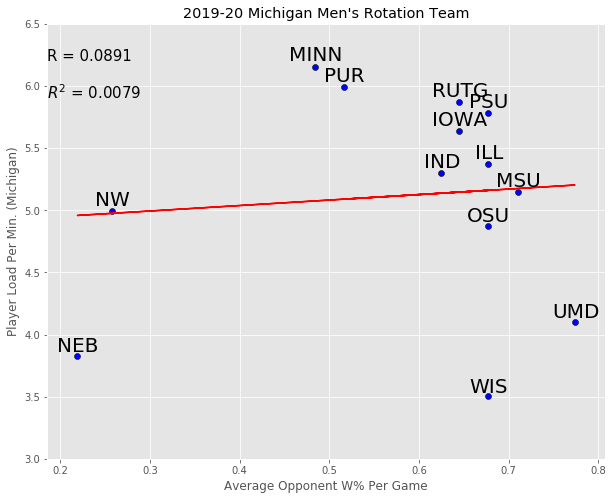

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


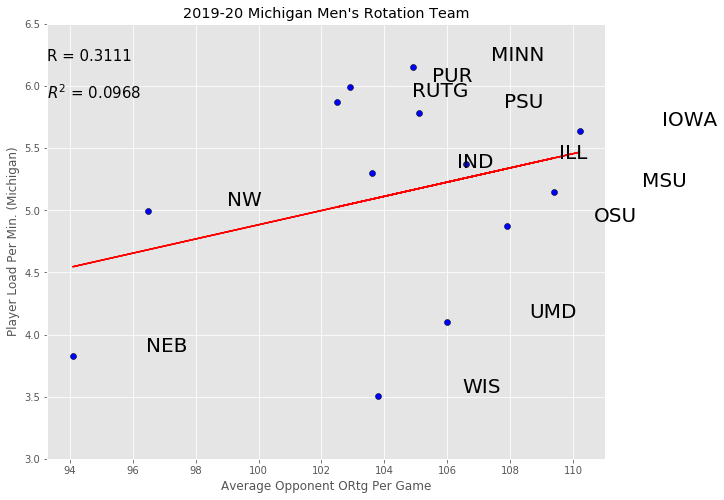

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


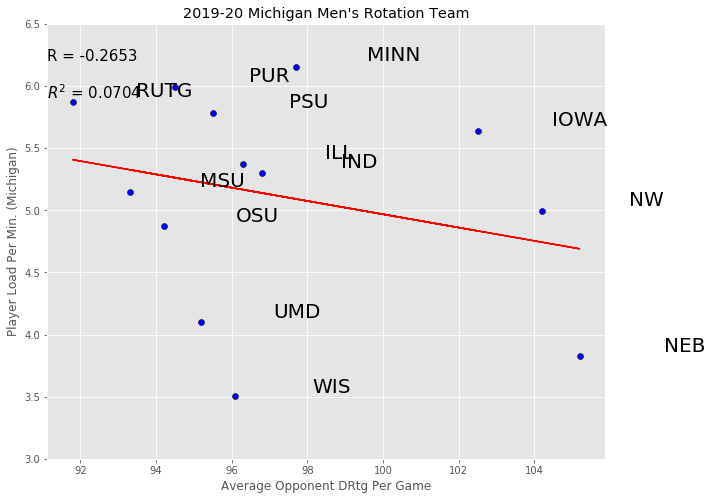

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


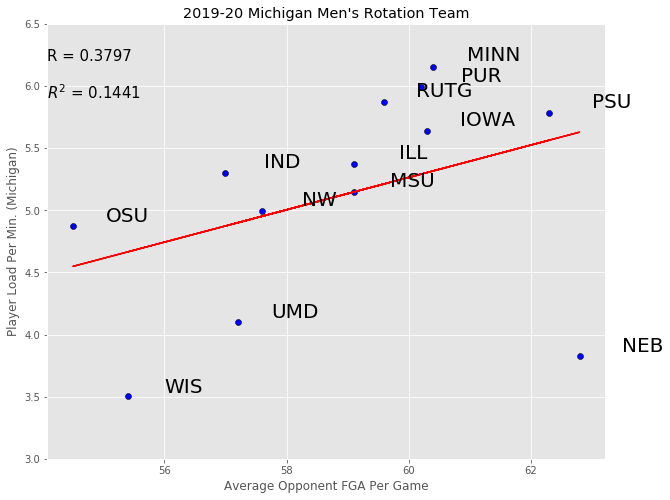

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


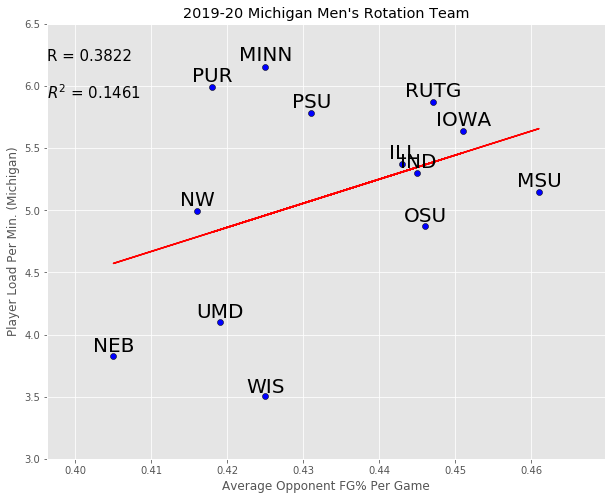

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


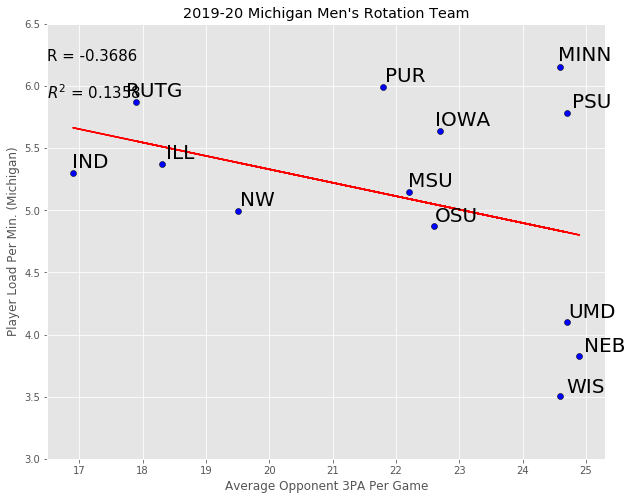

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


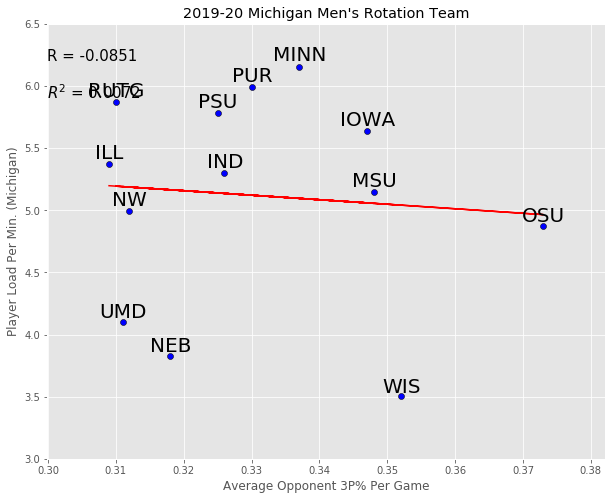

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


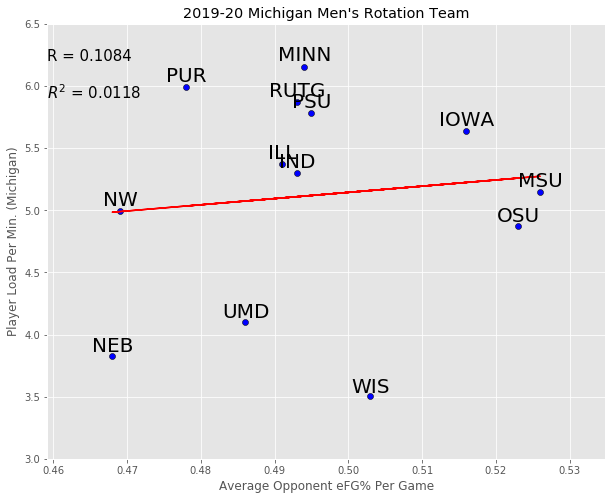

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


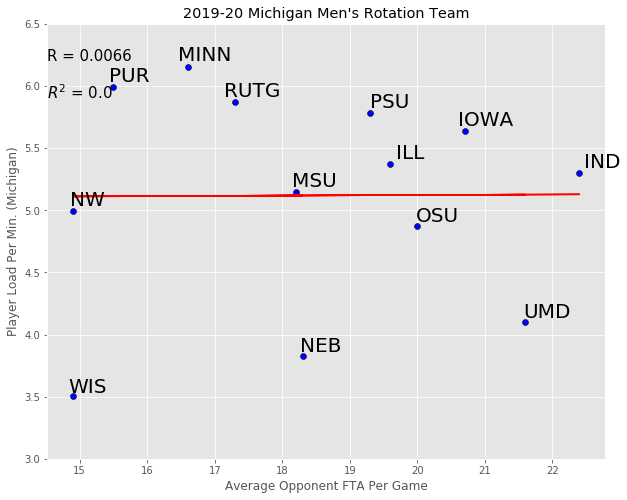

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


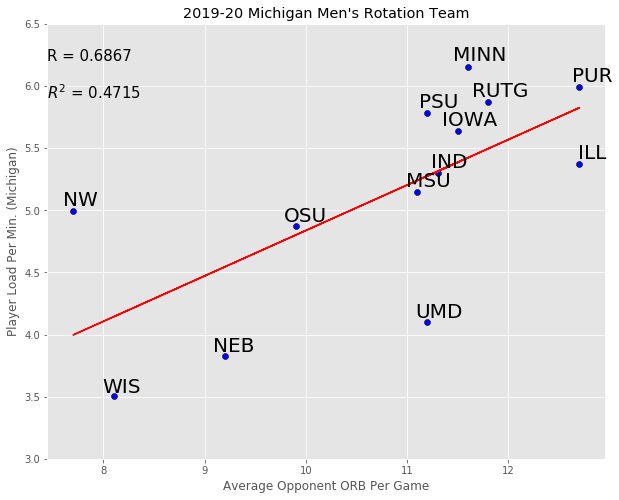

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


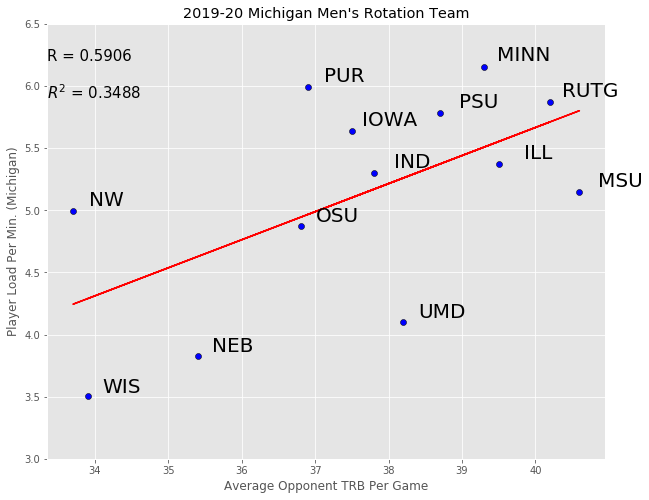

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


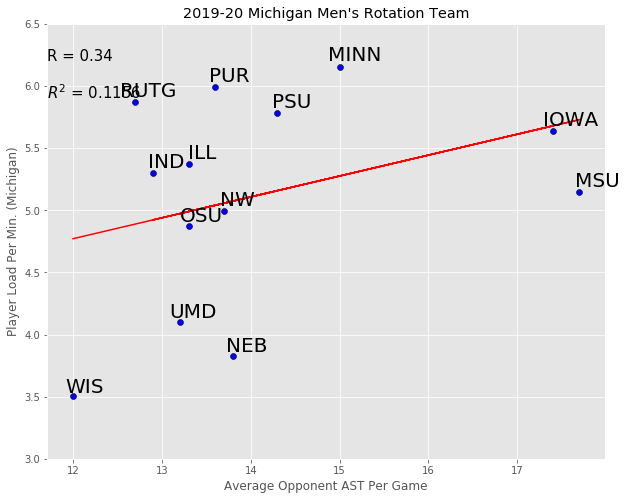

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


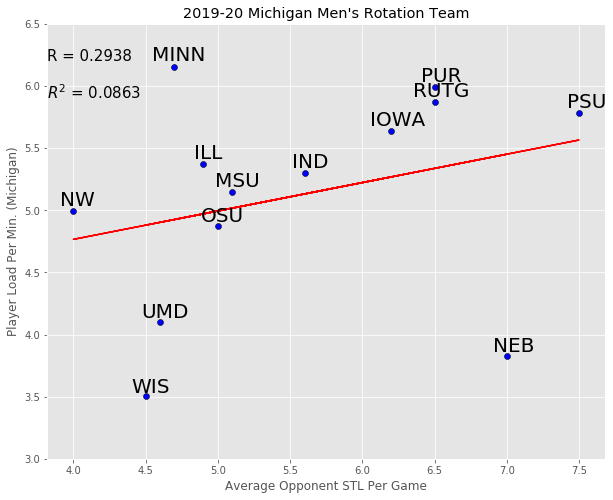

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


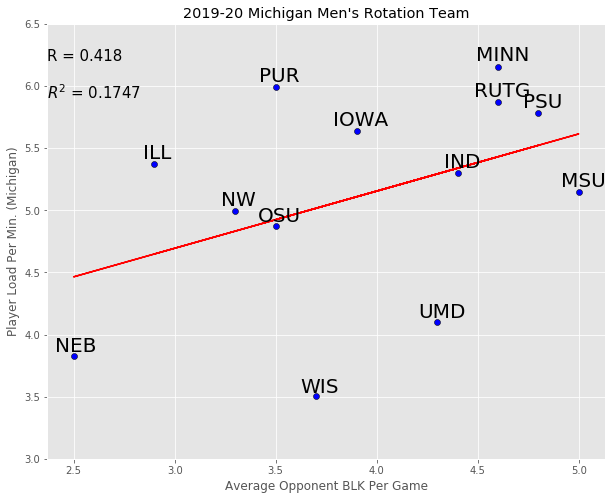

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


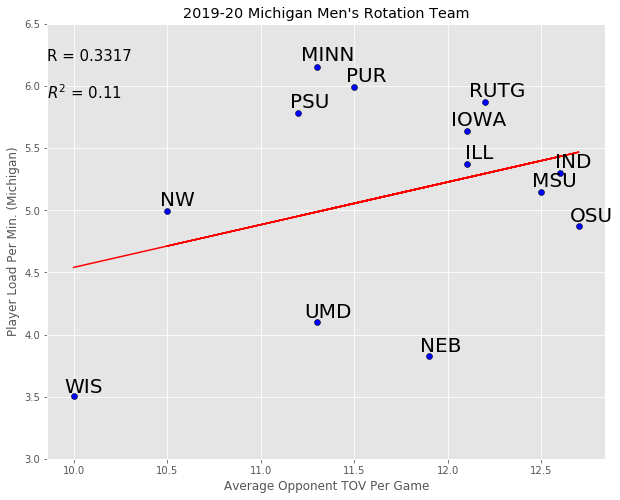

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


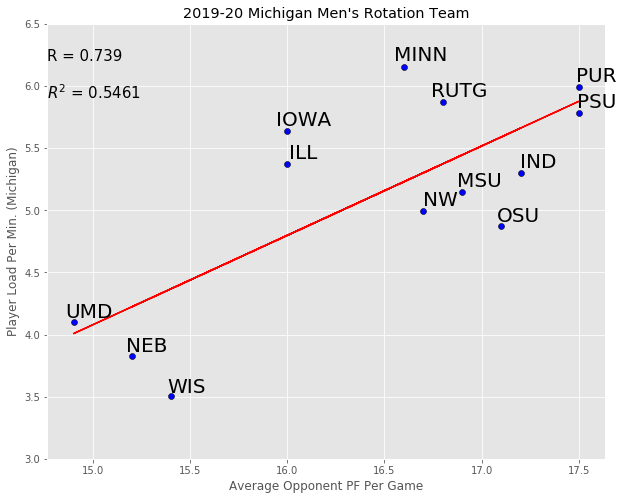

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


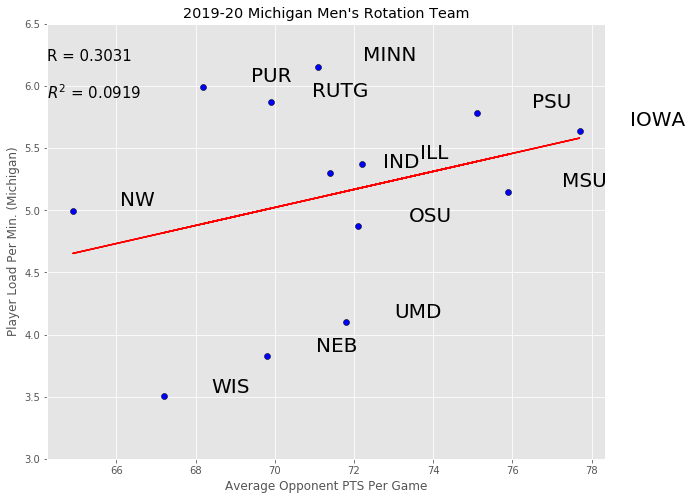

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


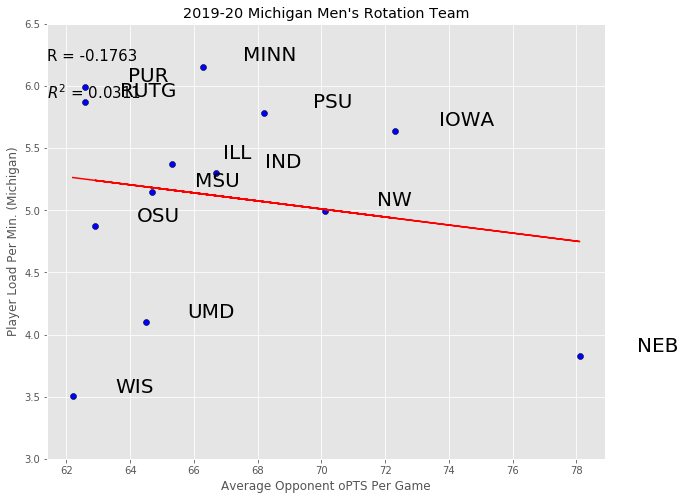

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


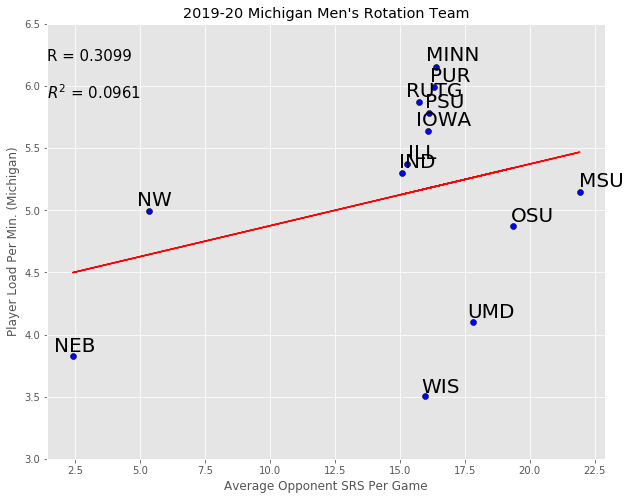

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


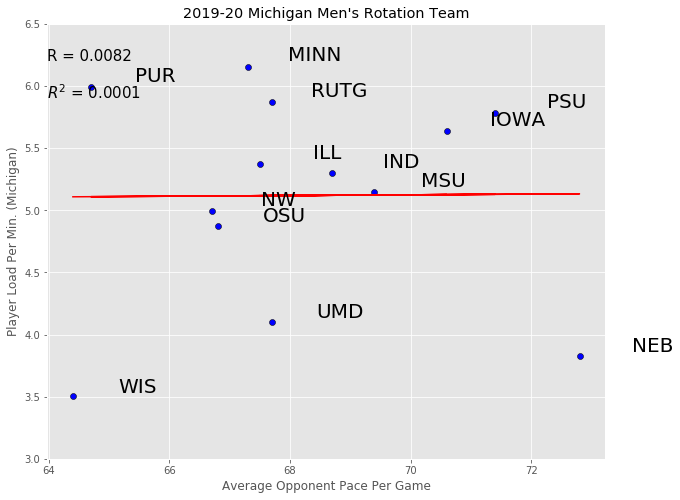

C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


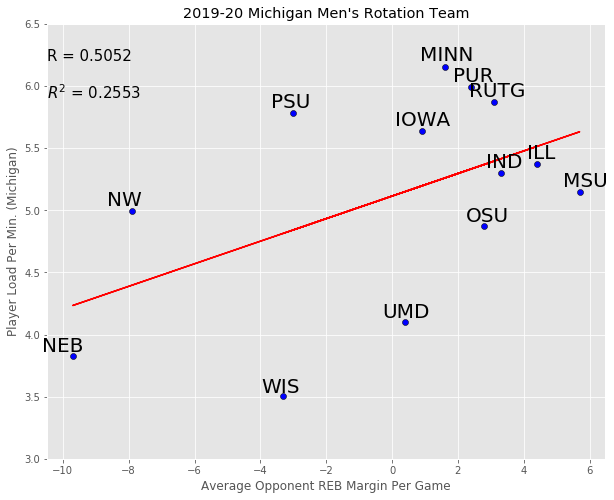

In [31]:
for cat in cat_list:
    cat_df = pd.merge(team.agg({"Player Load Per Minute": np.mean}), merged_avgs[cat], left_index=True, right_index=True)
    generate_scatter(cat_df[cat].tolist(), cat_df['Player Load Per Minute'].tolist(), cat_df, True, 'Team', cat)
    plt.show()


Nebraska


C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:74: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
C:\Users\Ben Riela\NEW ANACONDA\lib\site-packages\ipykernel_launcher.py:112: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


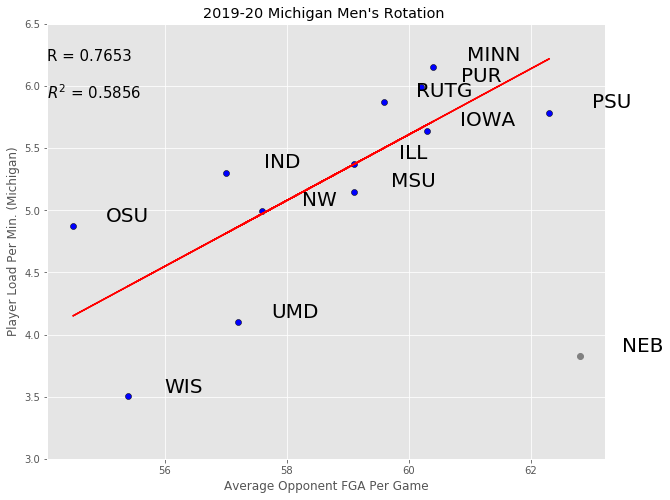

In [32]:
cat_df = pd.merge(team.agg({"Player Load Per Minute": np.mean}), merged_avgs['FGA'], left_index=True, right_index=True).drop('Nebraska')
generate_scatter(cat_df['FGA'].tolist(), cat_df['Player Load Per Minute'].tolist(), cat_df, True, '', 'FGA', nebraska=True)


In [33]:
#put all 4 on one graph?

In [34]:
# for cat in cat_list:
#     guards_df = pd.merge(guards.groupby('opponent').agg({"Player Load Per Minute": np.mean}), merged_avgs[cat], left_index=True, right_index=True)
#     generate_scatter(guards_df[cat].tolist(), guards_df['Player Load Per Minute'].tolist(), guards_df, True, 'Guards', cat, 'b', False)
#     wings_df = pd.merge(wings.groupby('opponent').agg({"Player Load Per Minute": np.mean}), merged_avgs[cat], left_index=True, right_index=True)
#     generate_scatter(wings_df[cat].tolist(), wings_df['Player Load Per Minute'].tolist(), wings_df, True, 'Wings', cat, 'g', False)
#     posts_df = pd.merge(posts.groupby('opponent').agg({"Player Load Per Minute": np.mean}), merged_avgs[cat], left_index=True, right_index=True)
#     generate_scatter(posts_df[cat].tolist(), posts_df['Player Load Per Minute'].tolist(), posts_df, True, 'Posts', cat, 'r', False)
#     team_df = pd.merge(team.groupby('opponent').agg({"Player Load Per Minute": np.mean}), merged_avgs[cat], left_index=True, right_index=True)
#     generate_scatter(team_df[cat].tolist(), team_df['Player Load Per Minute'].tolist(), team_df, True, 'Team', cat, 'm', False)
#     print('Guards = Blue, Wings = Green, Posts = Red, Team = Purple')
#     plt.show()